# 1. Extracción

Vamos a extraer datos de accidentes de tráfico en el municipio de Madrid para un posterior análisis de los mismos.
Las fuentes de las que disponemos son 3:

1. Ficheros excel del Ayuntamiento de Madrid con los datos de accidentes por distrito para los años 2019-2022: https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

2. Tabla de densidad de población por distritos de Madrid de Wikipedia: https://es.wikipedia.org/wiki/Anexo:Distritos_de_Madrid#cite_note-munimadrid-1

3. Tabla de indicadores demográficos de Edad media, % de población menor de 18 años y % mayor de 65 años por distritos en Madrid del INE: https://www.ine.es/jaxiT3/Datos.htm?t=31105

## 1.1 Comenzamos haciendo web scraping de la tabla de densidad de población de Wikipedia.

Quiero sacar las columnas de número (ID de distrito), Nombre de distrito y Densidad de población.

In [12]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd


In [13]:
# This is the url I will scrape
url = 'https://es.wikipedia.org/wiki/Anexo:Distritos_de_Madrid#cite_note-munimadrid-1'

In [14]:
# usamos requests para extraer el html en string

html=req.get(url).text

# parsear

soup=bs(html, 'html.parser')

In [18]:
tabla = soup.find_all('tbody')[0]

In [34]:
#ID de distrito
tabla('tr')[1]('td')[0].text.strip()

'1'

In [35]:
#Nombre distrito
tabla('tr')[1]('td')[1].text.strip()

'Centro'

In [101]:
#densidad
tabla('tr')[1]('td')[4].text.strip().replace('&', '')[-6:].replace(',','.')

'252.34'

In [119]:
#voy a convertir los datos en una lista de diccionarios
lst = []
for i in range(1, 22):
    
    id_distrito = (tabla('tr')[i]('td')[0].text.strip())
    nombre_distrito = (tabla('tr')[i]('td')[1].text.strip())
    densidad = (tabla('tr')[i]('td')[4].text.strip().replace('&', '')[-6:].replace(',','.'))
    
    
    lst.append({'id_distrito': id_distrito,
               'nombre_distrito': nombre_distrito,
               'densidad_pob': densidad})

lst

[{'id_distrito': '1', 'nombre_distrito': 'Centro', 'densidad_pob': '252.34'},
 {'id_distrito': '2',
  'nombre_distrito': 'Arganzuela',
  'densidad_pob': '235.16'},
 {'id_distrito': '3', 'nombre_distrito': 'Retiro', 'densidad_pob': '216.82'},
 {'id_distrito': '4',
  'nombre_distrito': 'Salamanca',
  'densidad_pob': '266.67'},
 {'id_distrito': '5',
  'nombre_distrito': 'Chamartín',
  'densidad_pob': '156.31'},
 {'id_distrito': '6', 'nombre_distrito': 'Tetuán', 'densidad_pob': '286.13'},
 {'id_distrito': '7', 'nombre_distrito': 'Chamberí', 'densidad_pob': '293.64'},
 {'id_distrito': '8',
  'nombre_distrito': 'Fuencarral-El Pardo',
  'densidad_pob': '010.04'},
 {'id_distrito': '9',
  'nombre_distrito': 'Moncloa-Aravaca',
  'densidad_pob': '025.12'},
 {'id_distrito': '10', 'nombre_distrito': 'Latina', 'densidad_pob': '091.95'},
 {'id_distrito': '11',
  'nombre_distrito': 'Carabanchel',
  'densidad_pob': '173.68'},
 {'id_distrito': '12', 'nombre_distrito': 'Usera', 'densidad_pob': '173.30'},

In [120]:
#convierto la lista de diccionarios a un dataframe
df_densidad = pd.DataFrame(lst)
df_densidad

,id_distrito,nombre_distrito,densidad_pob
0,1,Centro,252.34
1,2,Arganzuela,235.16
2,3,Retiro,216.82
3,4,Salamanca,266.67
4,5,Chamartín,156.31
5,6,Tetuán,286.13
6,7,Chamberí,293.64
7,8,Fuencarral-El Pardo,010.04
8,9,Moncloa-Aravaca,025.12
9,10,Latina,091.95


In [121]:
df_densidad.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_distrito      21 non-null     object
 1   nombre_distrito  21 non-null     object
 2   densidad_pob     21 non-null     object
dtypes: object(3)
memory usage: 4.1 KB


In [123]:
#el campo densidad lo convierto a float
df_densidad['densidad_pob'] = df_densidad['densidad_pob'].astype('float')

In [124]:
df_densidad

,id_distrito,nombre_distrito,densidad_pob
0,1,Centro,252.34
1,2,Arganzuela,235.16
2,3,Retiro,216.82
3,4,Salamanca,266.67
4,5,Chamartín,156.31
5,6,Tetuán,286.13
6,7,Chamberí,293.64
7,8,Fuencarral-El Pardo,10.04
8,9,Moncloa-Aravaca,25.12
9,10,Latina,91.95


In [225]:
df_densidad.to_csv('../data/densidad.csv', index=False)

## 1.2 Web scraping de la tabla de indicadores demográficos de Edad media, % de población menor de 18 años y % mayor de 65 años por distritos en Madrid del INE

In [142]:
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.by import By   # para buscar segun tag, id, class, etc...

In [143]:
# This is the url I will scrape
url = 'https://www.ine.es/jaxiT3/Datos.htm?t=31105'

In [144]:
opciones=Options()
PATH=ChromeDriverManager().install()
driver=webdriver.Chrome(PATH, options=opciones)

driver.get(url)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:02<00:00, 3.10MB/s]
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_3636\1677999589.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(PATH, options=opciones)


In [165]:
tablas = driver.find_elements(By.TAG_NAME, 'tr')

In [166]:
tablas[3].text

'2807901 Madrid distrito 01 43,5 8,5 15,8'

In [168]:
body = driver.find_elements(By.TAG_NAME, 'tbody')

In [178]:
#para la tabla que hay en la web, voy a ir por cada fila para almacenar los datos de las filas en una lista de listas.
tabla=driver.find_elements(By.TAG_NAME, 'tbody')[0]

filas=tabla.find_elements(By.TAG_NAME, 'tr')[1:23]


data=[]


for f in filas:
    
    elemen=f.find_elements(By.TAG_NAME, 'td')
    
    tmp=[]
    
    for e in elemen:
        
        tmp.append(e.text)
        
    data.append(tmp)

    
data

[['43,5', '8,5', '15,8'],
 ['44,4', '13,6', '19,8'],
 ['46,8', '13,7', '26,3'],
 ['45,8', '12,6', '23,8'],
 ['45,0', '15,3', '23,3'],
 ['43,7', '12,8', '19,2'],
 ['45,8', '12,0', '24,1'],
 ['42,7', '19,7', '21,1'],
 ['44,1', '16,4', '21,8'],
 ['46,2', '13,7', '24,5'],
 ['43,1', '16,0', '18,7'],
 ['42,1', '16,9', '16,7'],
 ['43,0', '15,3', '17,7'],
 ['47,5', '13,2', '26,1'],
 ['45,6', '14,0', '22,9'],
 ['42,0', '19,7', '18,5'],
 ['41,8', '18,0', '16,9'],
 ['38,8', '20,6', '12,6'],
 ['40,7', '20,0', '14,2'],
 ['43,0', '16,8', '17,4'],
 ['41,7', '20,0', '17,8']]

In [179]:
len(data)

21

In [227]:
df_demographics = pd.DataFrame(data, columns = ['edad_media', 'pob_men_18_perc', 'pob_may_65_perc'])
df_demographics

,edad_media,pob_men_18_perc,pob_may_65_perc
0,"43,5","8,5","15,8"
1,"44,4","13,6","19,8"
2,"46,8","13,7","26,3"
3,"45,8","12,6","23,8"
4,"45,0","15,3","23,3"
5,"43,7","12,8","19,2"
6,"45,8","12,0","24,1"
7,"42,7","19,7","21,1"
8,"44,1","16,4","21,8"
9,"46,2","13,7","24,5"


In [228]:
#cambio las comas por puntos para convertir posteriormente esos campos a float
df_demographics['edad_media'] = [x.replace(',', '.') for x in df_demographics['edad_media']]
df_demographics['pob_men_18_perc'] = [x.replace(',', '.') for x in df_demographics['pob_men_18_perc']]
df_demographics['pob_may_65_perc'] = [x.replace(',', '.') for x in df_demographics['pob_may_65_perc']]

df_demographics

,edad_media,pob_men_18_perc,pob_may_65_perc
0,43.5,8.5,15.8
1,44.4,13.6,19.8
2,46.8,13.7,26.3
3,45.8,12.6,23.8
4,45.0,15.3,23.3
5,43.7,12.8,19.2
6,45.8,12.0,24.1
7,42.7,19.7,21.1
8,44.1,16.4,21.8
9,46.2,13.7,24.5


In [229]:
df_demographics['edad_media'] = df_demographics['edad_media'].astype('float')
df_demographics['pob_men_18_perc'] = df_demographics['pob_men_18_perc'].astype('float')
df_demographics['pob_may_65_perc'] = df_demographics['pob_may_65_perc'].astype('float')
df_demographics

,edad_media,pob_men_18_perc,pob_may_65_perc
0,43.5,8.5,15.8
1,44.4,13.6,19.8
2,46.8,13.7,26.3
3,45.8,12.6,23.8
4,45.0,15.3,23.3
5,43.7,12.8,19.2
6,45.8,12.0,24.1
7,42.7,19.7,21.1
8,44.1,16.4,21.8
9,46.2,13.7,24.5


In [230]:
df_demographics.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   edad_media       21 non-null     float64
 1   pob_men_18_perc  21 non-null     float64
 2   pob_may_65_perc  21 non-null     float64
dtypes: float64(3)
memory usage: 632.0 bytes


In [231]:
#creo la columna población adulta restando los valores de menor de 18 y mayor de 65
df_demographics['pob_adulta_perc'] = 100 - (df_demographics['pob_men_18_perc'] + df_demographics['pob_may_65_perc'])
df_demographics

,edad_media,pob_men_18_perc,pob_may_65_perc,pob_adulta_perc
0,43.5,8.5,15.8,75.7
1,44.4,13.6,19.8,66.6
2,46.8,13.7,26.3,60.0
3,45.8,12.6,23.8,63.6
4,45.0,15.3,23.3,61.4
5,43.7,12.8,19.2,68.0
6,45.8,12.0,24.1,63.9
7,42.7,19.7,21.1,59.2
8,44.1,16.4,21.8,61.8
9,46.2,13.7,24.5,61.8


In [232]:
#creo la columna id_distrito en base al índice + 1
df_demographics['id_distrito'] = range(1, len(df_demographics) + 1)
df_demographics

,edad_media,pob_men_18_perc,pob_may_65_perc,pob_adulta_perc,id_distrito
0,43.5,8.5,15.8,75.7,1
1,44.4,13.6,19.8,66.6,2
2,46.8,13.7,26.3,60.0,3
3,45.8,12.6,23.8,63.6,4
4,45.0,15.3,23.3,61.4,5
5,43.7,12.8,19.2,68.0,6
6,45.8,12.0,24.1,63.9,7
7,42.7,19.7,21.1,59.2,8
8,44.1,16.4,21.8,61.8,9
9,46.2,13.7,24.5,61.8,10


In [233]:
#voy a poner la columna id_distrito como la primera para que quede más ordenado
first_column = df_demographics.pop('id_distrito')
  
# insert column using insert(position,column_name,
# first_column) function
df_demographics.insert(0, 'id_distrito', first_column)
df_demographics

,id_distrito,edad_media,pob_men_18_perc,pob_may_65_perc,pob_adulta_perc
0,1,43.5,8.5,15.8,75.7
1,2,44.4,13.6,19.8,66.6
2,3,46.8,13.7,26.3,60.0
3,4,45.8,12.6,23.8,63.6
4,5,45.0,15.3,23.3,61.4
5,6,43.7,12.8,19.2,68.0
6,7,45.8,12.0,24.1,63.9
7,8,42.7,19.7,21.1,59.2
8,9,44.1,16.4,21.8,61.8
9,10,46.2,13.7,24.5,61.8


In [234]:
df_demographics.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_distrito      21 non-null     int64  
 1   edad_media       21 non-null     float64
 2   pob_men_18_perc  21 non-null     float64
 3   pob_may_65_perc  21 non-null     float64
 4   pob_adulta_perc  21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 968.0 bytes


In [235]:
for c in df_demographics.select_dtypes('integer').columns:
    
    df_demographics[c]=pd.to_numeric(df_demographics[c], downcast='integer')
    
df_demographics.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_distrito      21 non-null     int8   
 1   edad_media       21 non-null     float64
 2   pob_men_18_perc  21 non-null     float64
 3   pob_may_65_perc  21 non-null     float64
 4   pob_adulta_perc  21 non-null     float64
dtypes: float64(4), int8(1)
memory usage: 821.0 bytes


In [236]:
df_demographics.to_csv('../data/demographics.csv', index=False)

## 1.3 Excels con los datos de accidentes de tráfico del municipio de Madrid

In [260]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df
#pd.set_option('display.max_rows', None)   # mostrar todas las filas del df

import regex as re

# para pintar
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

In [253]:
df_19 = pd.read_excel('../data/2019_Accidentalidad.xlsx')
df_20 = pd.read_excel('../data/2020_Accidentalidad.xlsx')
df_21 = pd.read_excel('../data/2021_Accidentalidad.xlsx')
df_22 = pd.read_excel('../data/2022_Accidentalidad.xlsx')


In [254]:
df_19.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,440068.049,4475679.170,N,NaN
1,2018S017842,2019-02-04,09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,440068.049,4475679.170,N,NaN
2,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,439139.603,4470836.854,S,NaN
3,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,439139.603,4470836.854,N,NaN
4,2019S000001,2019-01-01,03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 45 a 49 años,Mujer,NaN,NaN,439139.603,4470836.854,N,NaN


In [257]:
df_19_1 = df_2019.copy()
df_20_1 = df_2020.copy()
df_21_1 = df_2021.copy()
df_22_1 = df_2022.copy()

In [284]:
#concateno los 4 dataframes en uno para trabajar la limpieza con el dataframe final directamente
df_ori = pd.concat([df_19_1, df_20_1, df_21_1, df_22_1], axis=0)
df_ori.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160020 entries, 0 to 33992
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   num_expediente        160020 non-null  object        
 1   fecha                 160020 non-null  datetime64[ns]
 2   hora                  160020 non-null  object        
 3   localizacion          160020 non-null  object        
 4   numero                160015 non-null  object        
 5   cod_distrito          160015 non-null  float64       
 6   distrito              160015 non-null  object        
 7   tipo_accidente        160016 non-null  object        
 8   estado_meteorológico  143502 non-null  object        
 9   tipo_vehiculo         159513 non-null  object        
 10  tipo_persona          160017 non-null  object        
 11  rango_edad            160020 non-null  object        
 12  sexo                  160020 non-null  object        
 13  

In [285]:
df = df_ori.copy()

In [286]:
#función para checkear todas las columnas y el número de valores nulos que tienen
def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols=df.isna().mean() * 100  # el porcentaje
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

    sns.heatmap(df.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show();

'N nan cols: 13'

numero                   0.003125
cod_distrito             0.003125
distrito                 0.003125
tipo_accidente           0.002500
estado_meteorológico    10.322460
tipo_vehiculo            0.316835
tipo_persona             0.001875
cod_lesividad           44.736283
lesividad               44.736283
coordenada_x_utm         0.016873
coordenada_y_utm         0.016873
positiva_alcohol         0.343707
positiva_droga          99.730659
dtype: float64

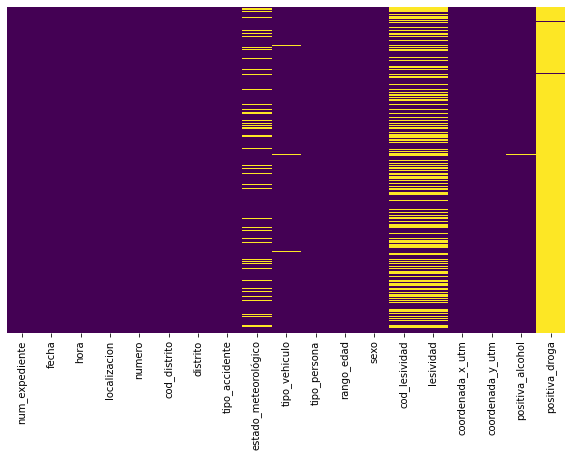

In [287]:
check_nan(df)

In [288]:
df.positiva_droga.unique()

array([nan,  1.])

La columna 'positiva_droga' tiene más de un 99% de nulos, pero voy a asumir que habiendo otra columna llamada 'positiva_alcohol', para cada accidente se han realizado pruebas de ambos tipos, así que todas los nulos del test de droga los voy a convertir a 0 (negativo)

In [289]:
df.positiva_droga.fillna(0, inplace=True)

In [290]:
df.positiva_droga.unique()

array([0., 1.])

In [291]:
#el campo 'positiva_droga' lo convierto a int
df['positiva_droga'] = df['positiva_droga'].astype('int')

'N nan cols: 12'

numero                   0.003125
cod_distrito             0.003125
distrito                 0.003125
tipo_accidente           0.002500
estado_meteorológico    10.322460
tipo_vehiculo            0.316835
tipo_persona             0.001875
cod_lesividad           44.736283
lesividad               44.736283
coordenada_x_utm         0.016873
coordenada_y_utm         0.016873
positiva_alcohol         0.343707
dtype: float64

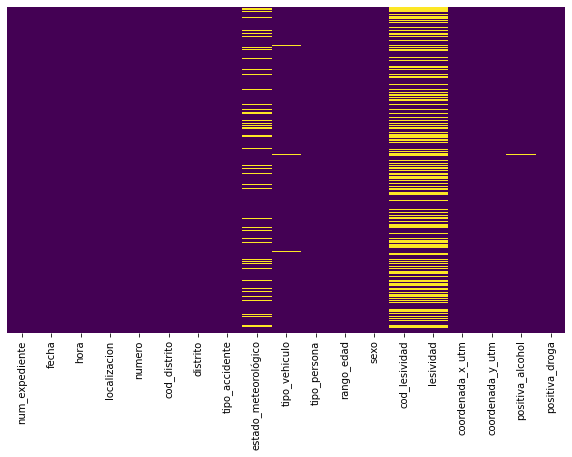

In [292]:
check_nan(df)

In [293]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160020 entries, 0 to 33992
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   num_expediente        160020 non-null  object        
 1   fecha                 160020 non-null  datetime64[ns]
 2   hora                  160020 non-null  object        
 3   localizacion          160020 non-null  object        
 4   numero                160015 non-null  object        
 5   cod_distrito          160015 non-null  float64       
 6   distrito              160015 non-null  object        
 7   tipo_accidente        160016 non-null  object        
 8   estado_meteorológico  143502 non-null  object        
 9   tipo_vehiculo         159513 non-null  object        
 10  tipo_persona          160017 non-null  object        
 11  rango_edad            160020 non-null  object        
 12  sexo                  160020 non-null  object        
 13  

In [294]:
#para la columna 'número' (número de la calle/vía) voy a rellenar los valores nulos con 'unknown'
df.numero.fillna('unknown', inplace=True)

In [296]:
#para la columna 'cod_distrito' voy a eliminar los 5 registros en los que no se conoce el distrito, 
#ya que mi futuro análisis requiere conocer este campo y son una pequeña muestra de todos los registros. 
#Después voy a convertir la columna en int
df.cod_distrito.fillna('unknown', inplace=True)

In [297]:
df.loc[df['cod_distrito'] == 'unknown']

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
27635,2020S016821,2020-11-23,07:45:00,"AUTOV. M-23, 0 (0.8 ENTRADA)",unknown,unknown,NaN,Colisión lateral,Despejado,Turismo,Conductor,De 50 a 54 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,444975.420,4474103.079,N,0
27636,2020S016821,2020-11-23,07:45:00,"AUTOV. M-23, 0 (0.8 ENTRADA)",unknown,unknown,NaN,Colisión lateral,Despejado,Turismo,Conductor,De 50 a 54 años,Mujer,14.0,Sin asistencia sanitaria,444975.420,4474103.079,N,0
25744,2021S015933,2021-09-11,19:40:00,AUTOV. M-500 / AUTOV. M-30,unknown,unknown,NaN,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,NaN,NaN,437390.155,4476258.031,N,0
25745,2021S015933,2021-09-11,19:40:00,AUTOV. M-500 / AUTOV. M-30,unknown,unknown,NaN,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 55 a 59 años,Hombre,NaN,NaN,437390.155,4476258.031,N,0
25746,2021S015933,2021-09-11,19:40:00,AUTOV. M-500 / AUTOV. M-30,unknown,unknown,NaN,Colisión fronto-lateral,Despejado,Turismo,Pasajero,De 55 a 59 años,Mujer,14.0,Sin asistencia sanitaria,437390.155,4476258.031,N,0


In [ ]:
df['cod_distrito'] = df['cod_distrito'].astype('int')